In [6]:
import taunet_utils
from os.path import join
import pandas as pd
import seaborn as sns
import json
from augmolino import augmentation, augmenter
import numpy as np

In [ ]:
dataset = "AITD_Dataset_A_beta_1"

input_data, output_data = taunet_utils.create_dataset(join("dataset", "audio"), 
                                                      join("dataset", "human_input", f"{dataset}.csv"),
                                                      join("..", "src", "af", "AFInC.dll"),
                                                      join("dataset", "saved", f"{dataset}.json"))

with open(join("dataset", "saved", f"{dataset}in.json"), "r") as json_file:
    input_data = json.load(json_file)
with open(join("dataset", "saved", f"{dataset}out.json"), "r") as json_file:
    output_data = json.load(json_file)

data = dict()
for key in input_data.keys():
    data[key] = input_data[key] + output_data[key]
print(data)
df = pd.DataFrame.from_dict(data).T
# df.index = df.index.astype(int)
df = df.sort_index()
df.columns = ["TEMPO",
              "T1A", 
              "T2A", 
              "CENTROID", 
              "L", 
              "ML", 
              "MH", 
              "H", 
              "CREST",
              "FLUX",
              "ATTACK_CUT",
              "ATTACK_BOOST",
              "SUSTAIN_CUT",
              "SUSTAIN_BOOST",
              "ATTACK_T1",
              "SUSTAIN_T1"]
df.head()


processed 1 4397-spicy-drums...
processed 1 h_shift_48000_-1...
processed 1 ch_shift_48000_1...
processed 1 und_mix_0_9_None...
processed 1 s_time_fade_1_in...
processed 1 _time_fade_1_out...
processed 1 time_offset_-0_5...
processed 1 time_offset_-1_0...
processed 1 time_offset_-1_5...
processed 1 time_offset_-2_0...
processed 1 _time_offset_0_0...
processed 1 _time_offset_0_5...
processed 1 _time_offset_1_0...
processed 1 _time_offset_1_5...
processed 2 x-808-x-percs-kb...
processed 2 h_shift_48000_-1...
processed 2 ch_shift_48000_1...
processed 2 und_mix_0_9_None...
processed 2 b_time_fade_1_in...
processed 2 _time_fade_1_out...
processed 2 time_offset_-0_5...
processed 2 time_offset_-1_0...
processed 2 time_offset_-1_5...
processed 2 time_offset_-2_0...
processed 2 _time_offset_0_0...
processed 2 _time_offset_0_5...
processed 2 _time_offset_1_0...
processed 2 _time_offset_1_5...
processed 3 ic-hip-hop-drums...
processed 3 h_shift_48000_-1...
processed 3 ch_shift_48000_1...
processe

,TEMPO,T1A,T2A,CENTROID,L,ML,MH,H,CREST,FLUX,ATTACK_CUT,ATTACK_BOOST,SUSTAIN_CUT,SUSTAIN_BOOST,ATTACK_T1,SUSTAIN_T1
1 4397-spicy-drums,0.3874,0.0184,0.1384,1.0,0.0762,0.0949,0.0958,0.0145,0.4940,0.0246,0.0,0.3476,0.0,0.7516,0.721025,0.381581
1 _time_fade_1_out,0.3874,0.0183,0.1395,1.0,0.1810,0.5066,0.1014,0.0074,0.5036,0.0233,0.0,0.3476,0.0,0.7516,0.721025,0.381581
1 _time_offset_0_0,0.3874,0.0221,0.1395,1.0,0.0823,0.0972,0.0961,0.0079,0.5083,0.0233,0.0,0.3476,0.0,0.7516,0.721025,0.381581
1 _time_offset_0_5,0.5189,0.0221,0.1396,1.0,0.1572,0.4533,0.0956,0.0067,0.5221,0.0000,0.0,0.3476,0.0,0.7516,0.721025,0.381581
1 _time_offset_1_0,0.7727,0.0222,0.1399,1.0,0.1810,0.4828,0.0961,0.0079,0.5185,0.0000,0.0,0.3476,0.0,0.7516,0.721025,0.381581


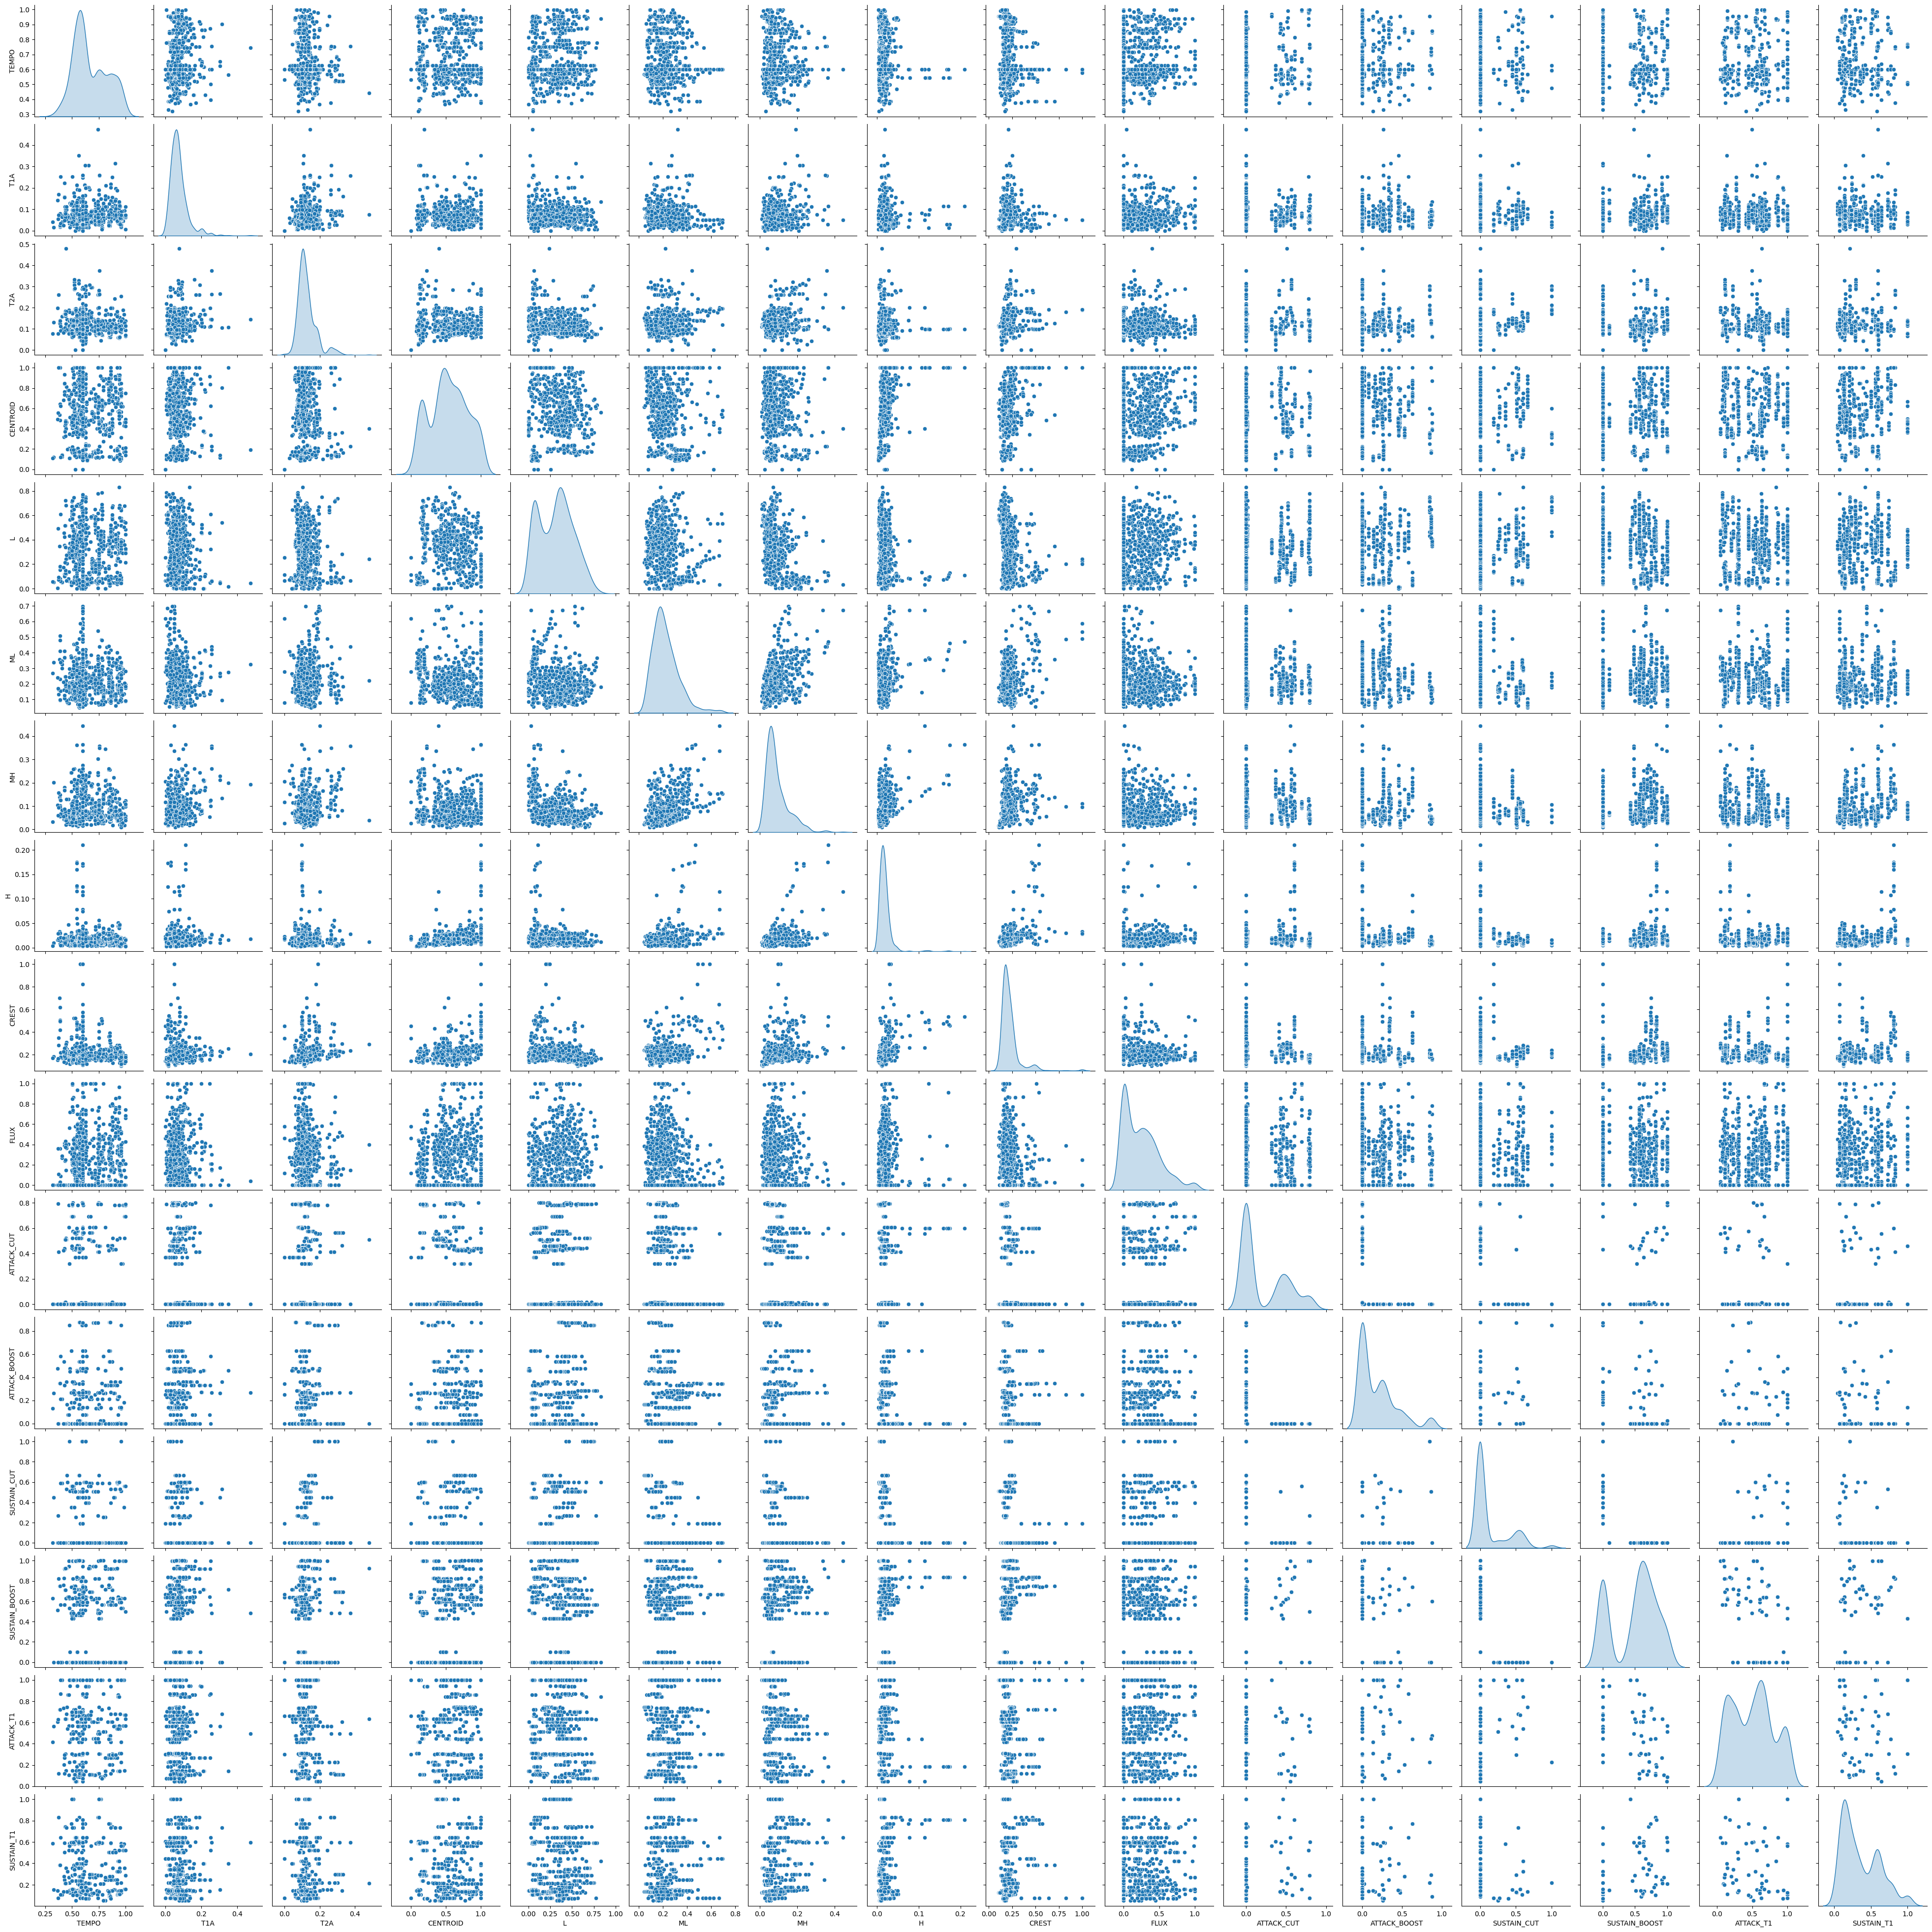

In [8]:
sns.pairplot(data=df, diag_kind='kde')

In [9]:
augmentations = []
offsets = np.arange(-2, 2, 0.5)
for offset in offsets:
    augmentations.append(augmentation.offsetAudio(offset, sample_rate=48000))

augmentations.append(augmentation.pitchShift(1, sample_rate=48000))
augmentations.append(augmentation.pitchShift(-1, sample_rate=48000))
augmentations.append(augmentation.fadeAudio(1, "in", sample_rate=48000))
augmentations.append(augmentation.fadeAudio(1, "out", sample_rate=48000))
augmentations.append(augmentation.mixAudio(join("dataset", "1 pink_noise.wav"), ratio=0.9, sample_rate=48000))
augmentations.append(augmentation.mixAudio(join("dataset", "2 white_noise.wav"), ratio=0.9, sample_rate=48000))

augs_offs = augmenter.augmenter(augmentations)
augs_offs.summary()


------------augmenter.summary------------
-----------------------------------------
 number of augmentations: 14     

 type:                                   
 > time_offset                 
 > time_offset                 
 > time_offset                 
 > time_offset                 
 > time_offset                 
 > time_offset                 
 > time_offset                 
 > time_offset                 
 > pitch_shift                 
 > pitch_shift                 
 > time_fade                 
 > time_fade                 
 > sound_mix                 
 > sound_mix                 
------------augmenter.summary------------



In [10]:
# augs_offs.execute(join("dataset", "audio"), "auto")